In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Картинки в numpy

yellow_image.shape=(4, 4, 3)


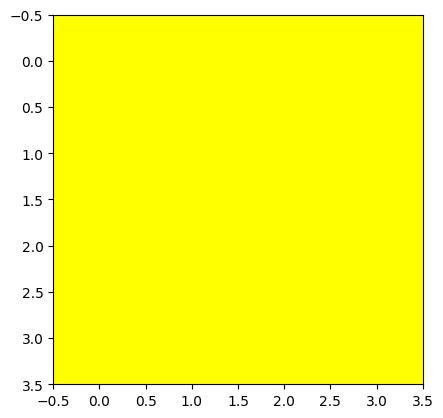

In [2]:
yellow_image = np.array([
    [[1, 1, 0], [1, 1, 0], [1, 1, 0], [1, 1, 0]],
    [[1, 1, 0], [1, 1, 0], [1, 1, 0], [1, 1, 0]],
    [[1, 1, 0], [1, 1, 0], [1, 1, 0], [1, 1, 0]],
    [[1, 1, 0], [1, 1, 0], [1, 1, 0], [1, 1, 0]],
], dtype=float)

print(f'{yellow_image.shape=}')
plt.imshow(yellow_image);

In [3]:
print(f'{yellow_image[0, 0]=}')  # верхний левый угол
print(f'{yellow_image[-1, 0]=}')  # нижний левый угол
print(f'{yellow_image[0, -1]=}')  # верхний правый угол
print(f'{yellow_image[-1, -1]=}')  # нижний правый угол

yellow_image[0, 0]=array([1., 1., 0.])
yellow_image[-1, 0]=array([1., 1., 0.])
yellow_image[0, -1]=array([1., 1., 0.])
yellow_image[-1, -1]=array([1., 1., 0.])


## Задание
Попробуйте нарисовать что-нибудь, меняя цвета в массиве.

Можно делать больше пикселей!

# Настоящие картинки

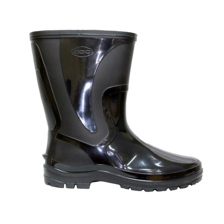

In [4]:
size = (224, 224)

boot_1 = Image.open('images/boot_1.png').resize(size)
boot_1

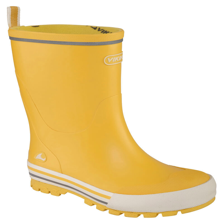

In [5]:
boot_2 = Image.open('images/boot_2.png').resize(size)
boot_2

In [6]:
# Посмотрим на изображение ботинка как на массив
boot_2_np = np.array(boot_2) / 255
boot_2_np

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], shape=(224, 224, 3))

In [7]:
# возьмем пиксель из центра
# объясните, как этот код берет пиксель "из центра"?
# что это за цвет?
print(boot_2_np[size[1] // 2, size[0] // 2])

[0.9254902  0.7254902  0.27058824]


In [8]:
def simple_image_distance(img_1, img_2):
    img_1_np = np.array(img_1) / 255
    img_2_np = np.array(img_2) / 255
    pixel_difference = img_1_np - img_2_np
    return np.abs(pixel_difference).mean()

In [9]:
items = [
    {'name': 'boot_1'},
    {'name': 'boot_2'},
    {'name': 'brick'},
    {'name': 'cap'},
]

for item in items:
    item['image'] = Image.open(f'images/{item["name"]}.png').resize(size)

items

[{'name': 'boot_1', 'image': <PIL.Image.Image image mode=RGB size=224x224>},
 {'name': 'boot_2', 'image': <PIL.Image.Image image mode=RGB size=224x224>},
 {'name': 'brick', 'image': <PIL.Image.Image image mode=RGB size=224x224>},
 {'name': 'cap', 'image': <PIL.Image.Image image mode=RGB size=224x224>}]

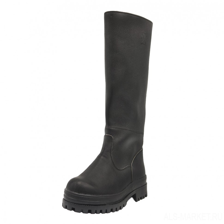

In [10]:
query_image = Image.open(f'images/boot_query.png').resize(size)
query_image

In [11]:
for item in items:
    print(f'Distance to {item["name"]}: {simple_image_distance(query_image, item["image"]):.02f}')

Distance to boot_1: 0.25
Distance to boot_2: 0.23
Distance to brick: 0.36
Distance to cap: 0.28


## Задание
Напишите функцию, которая находит имя ближайшего item-а, используя simple_image_distance

In [12]:
def find_closest_item(query_image, items):
    ...
    return name

In [13]:
# find_closest_item(query_image, items)  # должно выдать "boot_2"

# SigLip

In [14]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [17]:
import torch
from transformers import AutoModel, AutoProcessor
from transformers.image_utils import load_image

# load the model and processor
ckpt = "google/siglip2-base-patch16-224"
model = AutoModel.from_pretrained(ckpt).eval()
processor = AutoProcessor.from_pretrained(ckpt)

# load the image
inputs = processor(images=[query_image], return_tensors="pt").to(model.device)

# run infernece
with torch.no_grad():
    image_embeddings = model.get_image_features(**inputs)

print(image_embeddings.shape)

'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: 00b032a9-9a18-478b-96ef-19fbb0c7d9a5)')' thrown while requesting HEAD https://huggingface.co/google/siglip2-base-patch16-224/resolve/main/config.json
Retrying in 1s [Retry 1/5].
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


SSLError: (MaxRetryError("HTTPSConnectionPool(host='huggingface.co', port=443): Max retries exceeded with url: /api/models/google/siglip2-base-patch16-224 (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self-signed certificate in certificate chain (_ssl.c:1010)')))"), '(Request ID: a22906a0-9a00-4f6d-a71b-c031dfbde22b)')